# Natural Language Processing 

Date: 02/02/2020

Version: 5

Environment: Python 2.7.11 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment here:
* BeautifulSoup (for parse XML file, included in Anaconda Python 2.7) 
* re (for regular expression, included in Anaconda Python 2.7) 
* nltk.corpora (access the corpora in the NLTK data package, included in Anaconda Python 2.7) 
* nltk.stem (for removing morphological affixes from words, included in Anaconda Python 2.7) 
* nltk.tokenize (for dividing a string into substrings, included in Anaconda Python 2.7) 
* nltk.probality (for the finding and ranking of quadgram collocations or other association measures, included in Anaconda Python 2.7)
* nltk.util (Return the bigrams generated from a sequence of items, included in Anaconda Python 2.7) 
* nltk.collocations (for the finding and ranking of bigram, included in Anaconda Python 2.7)
* itertool.chain (for making an iterator, included in Anaconda Python 2.7)
* CountVectorizer (for creating a document-term matrix, included in Anaconda Python 2.7)

***

## 1. Introduction

This python file demonstrates how natural language processing is applied to a Patent XML file. The result can be used to do a statistical relational learning for a company in the future. Statistical relational learning can be found everywhere. For example, when an internet user search a book on Amazon website, the website not only will show this book, but also will recommend several books in the same kind. Therefore, in order to solve information overload problems or help users to search unspecified data, many companies take advantage of personalized recommendation systems to help their customers to find what they are really interested in. 

This original Patent file provides 2500 patents. Each patent has a large amount of information which can be analyzed. This task is going to extract Citation Networks, a Hierarchical IPC Codes, and Abstracts from each patant. This file shows how pre-processing is going to do and it can also give users relevant data in the future. 


This project has 4 tasks. First is to extract "Class", "Subclass", "Main Group", and "Subgroup" from each patent. We can use either element tree or beautiful soup library. My concern is that if we use element tree to parse the given XML file, it cannot directly parse the file since it has searval roots, but beautifulsoup can easily make it possible by just using the interpreter 'html.parser'. 

Task 2 and 3 are very tricky since it is going to extract its own citation IDs from each patent. We all know that each patent may or may not be another patents' citation. And one patent usually has several citations. Applying "find" and "findall" function accurately will help us to finish this task efficiently.

Task 4 is a much more challenge task and it is the most important part for preparing statistical relation learning. The general steps would be pre-processing (including tokenise), remove stopwords, create bigram and build count vector. After doing this task, I find there are several ways to do for this part, and finally I take advanatage of the better one. 

## 2.  Import libraries 

In [1]:
# Code to import libraries as needed in this assessment
from bs4 import BeautifulSoup
import re
import nltk
from nltk.probability import *
from nltk.collocations import *
from nltk.tokenize.regexp import RegexpTokenizer
from nltk.tokenize import MWETokenizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk import collocations
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from __future__ import division
from itertools import chain

In [2]:
nltk.__version__

'3.4.4'

In [3]:
!python --version

Python 2.7.16 :: Anaconda, Inc.


***

## 3. Examining and loading data

### Parse the file
Here comes a chanllenge problem for parsing the XML file: only a part of XML file can be read not all of it. I think it is because
every encode tag is at the beginning of the part of a file so that beautifulsoup cannot recognize several roots. I try several methods(such as just open the file and parse) since I want to know which method is more easy and straightforward. 
When I went through the beautifulsoup documentation in the official website, I notice that using Python’s "html.parser" instead of "lxml" function to read the file is much better to solve this problem, but the shortage is that the running time is slower than the "lxml" parser.

In [4]:
soup = BeautifulSoup(open("./patents.xml"),"html.parser") 

## 4. Parsing XML and Extracting all the required information 

Here, you should write your own code to parsing the xml file, and extract the hierarchical IPC code, citation network, and abstracts. We strongly suggest that you use existing Python libraries to parse the xml file. Store the extracted information in files if required in the assessment description.


## Task 1:

### step 1: Finding all patent ID
Finding all patent ID by using beautifulsoup.
Because there are many patent ID in each part, our goal is to find the doc-number under publication reference tag.

In [5]:
#finding all of publication-ference tag.
application=soup.find_all("publication-reference")
#there is just 1 patentid under 'doc-number'tag so that we can just use 'find' instead of 'findall' function 
docid=[item.find("doc-number") for item in application]
#extract text contents
patentid=[item.string for item in docid]
patentid[:3]

[u'PP021722', u'RE042159', u'RE042170']

Testing the total number of patent ID

In [6]:
print "the number of patent ID: ",len(patentid)

the number of patent ID:  2500


### step 2: Finding all of corrsponding tags
Finding all corresponding tags by using beautifulsoup.

In [7]:
#extracting section,patent class,subclass, main-group and subgroup by using findall function
section = [section.string for section in soup.find_all("section")]
patent_class = [pclass.string for pclass in soup.find_all("class")]
subclass = [subclass.string for subclass in soup.find_all("subclass")]
main_group = [main_group.string for main_group in soup.find_all("main-group")]
subgroup=[sub.string for sub in soup.find_all("subgroup")]


Testing the length of each

In [8]:
print "length of section is: ", len(section),"\nlength of patent class is: ",len(patent_class),\
"\nlength of subclass is: ",len(subclass),"\nlength of main group is: ",len(main_group),\
"\nlength of subgroup is: ",len(subgroup)

length of section is:  2500 
length of patent class is:  2500 
length of subclass is:  2500 
length of main group is:  2500 
length of subgroup is:  2500


### step 3: writing to a text file
Now we can see all of the elements have the same length. It's time to write to a file in the correct format

In [9]:
output_handle=open('classification.txt','w+')
for i in range(len(patentid)):
    #make all of pattern to string
    new_line=str(patentid[i])+":"+str(section[i])+","+str(patent_class[i])+","+str(subclass[i])+","+str(main_group[i])+","+str(subgroup[i])+"\n"
    output_handle.write(new_line)
    i=i+1
    
output_handle.close()

The output file is under the same dicrectory with this jupiter file. 

## Task 2:

### step 1: Finding all of citation 
In order to find all of citations, first of all is to get all of the references-cited tags. Then all of doc-numbers have been found under the referencs-cited tags because one references-cited tag has several doc-number tags. It will return a list withous moving any doc-number tags.

In [10]:
#find all of reference-cited tag
reference=soup.find_all("references-cited")
#because there are more than 1 doc-number under reference-cited, we still need to use findall function to search
citation=[item.find_all("doc-number") for item in reference]
citation[1]

[<doc-number>4954776</doc-number>,
 <doc-number>4956606</doc-number>,
 <doc-number>5015948</doc-number>,
 <doc-number>5115193</doc-number>,
 <doc-number>5180978</doc-number>,
 <doc-number>5332966</doc-number>,
 <doc-number>5332996</doc-number>,
 <doc-number>5351003</doc-number>,
 <doc-number>5381090</doc-number>,
 <doc-number>5521496</doc-number>,
 <doc-number>5914593</doc-number>]

### step 2: Writing into a text file
My method is to take cited IDs from the index of the patent IDs. For example: when I use the first patent ID, I can take the first element from citation list and extract all of the corresponding cited IDs.

In [11]:
output_handle=open('citations.txt','w+')
variable=""
#let patent ID and its cited patent ID with the same index
for i in range(len(patentid)):
    for num in citation[i]:
        for element in num:
            #extract all of doc-numbers context contents
            variable+=str(element.string)+","
    new_variable=variable.rstrip(",") #remove comma at the end of string
    line=str(patentid[i])+":"+new_variable+"\n"
    variable=""
    output_handle.write(line)

output_handle.close()

## Task 3:

In terms of this question, I directly use the text file from the last question. My thoughts is that removing the citing IDs before comma, and then tokenise the comma between the cited IDs and the extra line tag which is between each lines. Then I use FreqDist function from "nltk" library to know the frquency of each cited IDs. Also, I sort the cited IDs to make users read and search more conveniently.

In [12]:
input_handle=open('citations.txt','r')
output_handle=open('cited.txt','w+')

#make citation file as input file and read each line
text_file=""
for line in input_handle:
    for i in range(len(line)):
        if line[i]==":":#remove the citing IDs before the colon
            new_line=line[i+1:]
            text_file+=new_line
            
#remove comma and extra line tag    
tokenizer = RegexpTokenizer(r"[\n\,]", gaps=True) 
words=tokenizer.tokenize(text_file) 

#automatically create a dictionary with the key for cited IDs and value for frequency
fdist1=FreqDist(words)

#sort the keys to decending order to make the user read or search a file conveniently
for key in sorted(fdist1.keys()):
    lines=str(key)+":"+str(fdist1[key])+"\n"
    output_handle.write(lines)
    
input_handle.close()
output_handle.close()

## Task 4:
For this part of questions, my procedure is : 
* 1.extract abstracts
* 2.tokenise 
* 3.stemming and Lemmatization
* 4.remove stopwords 
* 5.bigram 
* 6.remove top-20 most frequent words 
* 7.remove words only appearing in one abstract
* 8.bulid count vector 
* 9.write into a file

### STEP 1: Extract all of abstracts
Fiest of all, abstracts need to be extrated. From the XML file, every abstract may have 1 or more 'p' tags. It indicates that we need to find all of them under each patent ID. Then we convert list to string in order to prepare the next tokenise step.

1.1: Finding all of abstract by using beautifulsoup

In [13]:
#find all of  abstract tags
abstract_tag=soup.find_all("abstract")
print "The number of abstract tags: ",len(abstract_tag)

The number of abstract tags:  2500


1.2: Finding all of 'p' element under each abstract

In [14]:
#evry patentid may have serveral abstracts, finding al of 'p's under each patent ID.
find_p=[item.find_all("p") for item in abstract_tag]
find_p[1]

[<p id="p-0001" num="0000">A sensing device includes a circuit that compensates for time and spatial changes in temperature. The circuit includes elements to correct for variation in permeability of a highly permeable core of a differential variable reluctance transducer as temperature changes. The circuit also provides correction for temperature gradients across coils of the transducer.</p>]

In [15]:
print "The number of 'p' elements: ",len(find_p)

The number of 'p' elements:  2500


1.3: Extracting text contents between 'p' tags

In [16]:
#remove 'p' tags and extract its text contents
tag_list=[]
for each in find_p:
    a=[tag.string for tag in each]
    tag_list.append(a)
tag_list[1]

[u'A sensing device includes a circuit that compensates for time and spatial changes in temperature. The circuit includes elements to correct for variation in permeability of a highly permeable core of a differential variable reluctance transducer as temperature changes. The circuit also provides correction for temperature gradients across coils of the transducer.']

In [17]:
print "The number of text contents: ",len(tag_list)

The number of text contents:  2500


1.4: merge those abstracts which have more than 2 text contents under a single abstract element

In [18]:
#merge those abstracts which have more than 2 text content from 'p's under the single abstract tag  
new_tag_list=[]
new_item=""
for each in tag_list:
    #check if each item in a single patent ID has 2 or more abstracts
    if len(each)<2:
        new_tag_list.append(each)
    else:
        for item in each:
            #some text content of p is "\n"(extra line tag), it should be avoided
            if item!=None:
                new_item+=item
        new_tag_list.append([new_item])
        new_item=""
    
new_tag_list[0]

[u'A new apple tree named \u2018Daligris\u2019 is disclosed. The fruit of the new variety is particularly notable for its eating quality and distinctive flavor and appearance. The fruit is very sweet and has a pronounced aniseed flavor, and takes on a distinctive red orange coloration as it ripens on the tree.']

In [19]:
print "The total number of abstracts after merging 'p' tags: ", len(new_tag_list)

The total number of abstracts after merging 'p' tags:  2500


1.5: Converting list to string in order to tokenise

In [20]:
#firstly: coverting inside list to string 
abstracts = [item for sublist in new_tag_list for item in sublist]
abstracts[0]

u'A new apple tree named \u2018Daligris\u2019 is disclosed. The fruit of the new variety is particularly notable for its eating quality and distinctive flavor and appearance. The fruit is very sweet and has a pronounced aniseed flavor, and takes on a distinctive red orange coloration as it ripens on the tree.'

In [21]:
print "number of abstracts: ",len(abstracts)

number of abstracts:  2500


Case normalisation

In [22]:
#secondly, converting list to string and use it to tokenise
abstracts_text=""
for each in abstracts:
    #case nomalisation
    abstracts_text+=each.lower()
abstracts_text[0]

u'a'

## 5. Preprocessing the abstracts 

In this section, you should write Python code to pre-process the abstracts, convert them into the required format, and store the processed data. We suggest that you refer to the lecture and tutorial materials and the references provided in those materials.


## Task 4 continued

### STEP 2: Tokenise
I already lower the case from last step, next, I am going to use regular expression to tokenise.

In [23]:
#tokenise 
pattern = r"""(?x)                   # set flag to allow verbose regexps
              (?:[A-Z]\.)+           # abbreviations, e.g. U.S.A.
              |\d+(?:\.\d+)?%?       # numbers, incl. currency and percentages
              |\w+(?:[-']\w+)*       # words w/ optional internal hyphens/apostrophe
              |(?:[+/\-@&*])         # special characters with meanings
            """

In [24]:
#tokenised each abstract 
abstrcts_tokenised=[]
for each in abstracts:
    #case normalisation: make the context to lowercase
    a=nltk.regexp_tokenize(each.lower(), pattern)
    abstrcts_tokenised.append(a)
abstrcts_tokenised[0]

[u'a',
 u'new',
 u'apple',
 u'tree',
 u'named',
 u'daligris',
 u'is',
 u'disclosed',
 u'the',
 u'fruit',
 u'of',
 u'the',
 u'new',
 u'variety',
 u'is',
 u'particularly',
 u'notable',
 u'for',
 u'its',
 u'eating',
 u'quality',
 u'and',
 u'distinctive',
 u'flavor',
 u'and',
 u'appearance',
 u'the',
 u'fruit',
 u'is',
 u'very',
 u'sweet',
 u'and',
 u'has',
 u'a',
 u'pronounced',
 u'aniseed',
 u'flavor',
 u'and',
 u'takes',
 u'on',
 u'a',
 u'distinctive',
 u'red',
 u'orange',
 u'coloration',
 u'as',
 u'it',
 u'ripens',
 u'on',
 u'the',
 u'tree']

### STEP 3:  Stemming and Lemmatization
After tokenising the whole text, it has a lot of similar words in different meanings. For example, nouns are inflected in the plural, verbs are inflected in the various tenses, and adjectives are inflected in the comparative/superlative. The derivation process creates a new word out of an existing one often by adding either a prefix or a suffix. Therefore, it is important to do stemming and lemmatization process, otherwise it would affect counting bigrams in the next step owing to tence or useless prefix(such as '/apple'). That's also the reason why I am doing lemmatization before doing the bigrams: it would help a lot with next several steps.

Here, I tried 3 ways for stemming and accept the third one eventually.

1.The first method is to use the Porter Stemmer. However, for some special cases, the Porter Stemmer might not work as expected, like 'apple'→'appl','disclosed'→'disclos'. That're not we want. And bigram are used for speech recognition, spelling correction, entity detection, if we output wrong in advance from this step, the bigram does not make any sense either.

In [21]:
# stemmer_noun = PorterStemmer()
# stemmer_list = []
# ste_temp_list=[]
# for each in abstrcts_tokenised:
#     for item in each:
#         stem_sent = stemmer_noun.stem(item)
#         ste_temp_list.append(stem_sent)
#     stemmer_list.append(ste_temp_list)
#     ste_temp_list=[]
# #show only first abstract text content
# print stemmer_list[0]

[u'a', u'new', u'appl', u'tree', u'name', u'daligri', u'is', u'disclos', u'the', u'fruit', u'of', u'the', u'new', u'varieti', u'is', u'particularli', u'notabl', u'for', u'it', u'eat', u'qualiti', u'and', u'distinct', u'flavor', u'and', u'appear', u'the', u'fruit', u'is', u'veri', u'sweet', u'and', u'ha', u'a', u'pronounc', u'anise', u'flavor', u'and', u'take', u'on', u'a', u'distinct', u'red', u'orang', u'color', u'as', u'it', u'ripen', u'on', u'the', u'tree']


2.The Second method is to use the Porter Stemmer. However, for some special cases, the Porter Stemmer might not work as expected, like 'tree'→'tre','particular'→'particul'. That would influence with searching bigram as well.

In [22]:
# stemmer_verb = LancasterStemmer()
# stemmer_list = []
# ste_temp_list=[]
# for each in abstrcts_tokenised:
#     for item in each:
#         stem_sent = stemmer_verb.stem(item)
#         ste_temp_list.append(stem_sent)
#     stemmer_list.append(ste_temp_list)
#     ste_temp_list=[]
# print stemmer_list[0]

[u'a', u'new', u'appl', u'tre', u'nam', u'daligr', u'is', u'disclos', u'the', u'fruit', u'of', u'the', u'new', u'vary', u'is', u'particul', u'not', u'for', u'it', u'eat', u'qual', u'and', u'distinct', u'flav', u'and', u'appear', u'the', u'fruit', u'is', u'very', u'sweet', u'and', u'has', u'a', u'pronount', u'anisee', u'flav', u'and', u'tak', u'on', u'a', u'distinct', u'red', u'orang', u'col', u'as', u'it', u'rip', u'on', u'the', u'tre']


3.The third way is to use a lemmatizer that utilises more information about the language to accurately identify the lemma for each word. And looks much better. I accept this method.

In [23]:
#firstly, code should make use the POS tags of each word to decide the lexical base form
tagged_sents = []
for sent in abstrcts_tokenised:
    tagged_sent = nltk.tag.pos_tag(sent)
    tagged_sents.append(tagged_sent)
#because the file is large, I just ask to show the first abstract to check the output
print tagged_sents[0]

[(u'a', 'DT'), (u'new', 'JJ'), (u'apple', 'NN'), (u'tree', 'NN'), (u'named', 'VBN'), (u'daligris', 'NN'), (u'is', 'VBZ'), (u'disclosed', 'VBN'), (u'the', 'DT'), (u'fruit', 'NN'), (u'of', 'IN'), (u'the', 'DT'), (u'new', 'JJ'), (u'variety', 'NN'), (u'is', 'VBZ'), (u'particularly', 'RB'), (u'notable', 'JJ'), (u'for', 'IN'), (u'its', 'PRP$'), (u'eating', 'JJ'), (u'quality', 'NN'), (u'and', 'CC'), (u'distinctive', 'JJ'), (u'flavor', 'NN'), (u'and', 'CC'), (u'appearance', 'VB'), (u'the', 'DT'), (u'fruit', 'NN'), (u'is', 'VBZ'), (u'very', 'RB'), (u'sweet', 'JJ'), (u'and', 'CC'), (u'has', 'VBZ'), (u'a', 'DT'), (u'pronounced', 'VBN'), (u'aniseed', 'NN'), (u'flavor', 'NN'), (u'and', 'CC'), (u'takes', 'VBZ'), (u'on', 'IN'), (u'a', 'DT'), (u'distinctive', 'JJ'), (u'red', 'JJ'), (u'orange', 'NN'), (u'coloration', 'NN'), (u'as', 'IN'), (u'it', 'PRP'), (u'ripens', 'VBZ'), (u'on', 'IN'), (u'the', 'DT'), (u'tree', 'NN')]


In [24]:
def get_wordnet_pos(treebank_tag):
    #tag startwith J,change to ADJ
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    #tag name startwith V, change to VERB
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    #tag name startwith N, change to NUUN
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    #tag name startwith R, change to ADV
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        #change else tag to NOUN
        return wordnet.NOUN

In [25]:
#use wordnetlemmatizer to lemmization
lemmatizer = WordNetLemmatizer()

final_tokens =[]
for tagged_set in tagged_sents:
    final_tokens.append([lemmatizer.lemmatize(w[0], get_wordnet_pos(w[1])) for w in tagged_set])
#just show the first abstract
print final_tokens[0]

[u'a', u'new', u'apple', u'tree', u'name', u'daligris', u'be', u'disclose', u'the', u'fruit', u'of', u'the', u'new', u'variety', u'be', u'particularly', u'notable', u'for', u'it', u'eating', u'quality', u'and', u'distinctive', u'flavor', u'and', u'appearance', u'the', u'fruit', u'be', u'very', u'sweet', u'and', u'have', u'a', u'pronounce', u'aniseed', u'flavor', u'and', u'take', u'on', u'a', u'distinctive', u'red', u'orange', u'coloration', u'a', u'it', u'ripen', u'on', u'the', u'tree']


### Now it is time to make a dictionary
Each patent ID belongs to its own abstract/abstracts

In [26]:
#create dictionary
dic={}
#key values are patent id, values are corresponding abstracts after tokenise and stemming
for i in range(len(patentid)):
    dic[patentid[i]]=final_tokens[i]

In [27]:
#check with the first abstarct
dic['07910771']

[u'the',
 u'invention',
 u'relate',
 u'to',
 u'a',
 u'method',
 u'for',
 u'produce',
 u'acrylic',
 u'acid',
 u'in',
 u'one',
 u'step',
 u'by',
 u'an',
 u'oxydehydration',
 u'reaction',
 u'of',
 u'glycerol',
 u'in',
 u'the',
 u'presence',
 u'of',
 u'molecular',
 u'oxygen',
 u'the',
 u'reaction',
 u'preferably',
 u'carry',
 u'out',
 u'in',
 u'gaseous',
 u'phase',
 u'in',
 u'the',
 u'presence',
 u'of',
 u'a',
 u'suitable',
 u'catalyst']

Now, Let's check how many types we have in the whole corpus and the lexical diversity

In [28]:
words = list(chain.from_iterable(dic.values())) #put all of abstract into a whole list
vocab = set(words) #extract unique words
lexical_diversity = len(words)/len(vocab)
print "Vocabulary size: ",len(vocab),"\nTotal number of tokens: ", len(words), \
"\nLexical diversity: ", lexical_diversity

Vocabulary size:  9520 
Total number of tokens:  281148 
Lexical diversity:  29.5323529412


### STEP 4:  Removing stopwords

The reason why Removing stopwords is that if the stopwords are not removed, the bigram would give us some words that does not make any sense, such as "is that", "It is", which were not what we were looking for. So we need to remove the stopwords before we doing the bigrams.
Here, Instead of using the built-in stopword list of NLTK, I use a rich stopword list from textfile. I assume that the stopwords textfile is in the same directory with this assignment jupiter notebook.

PS:The reason why I append 2 words in stopwords file below is that after I remove the stopwords(without appending these two) and search in bigram, I notice that 'include' and 'provide' are the most frequent two words that appears as verb, which seems not a bigram collections with other words such as 'include tree'. So I remove them in advance here.

In [29]:
stopwords = []
#assume stopwords file are under the same directory with this assignment file
with open('./stopwords_en.txt') as f:
    stopwords = f.read().splitlines()
#append the words that will interfer with searching bigrams
stopwords.append('/')
stopwords.append('include')
stopwords.append('provide')

In [30]:
stopwords_list = set(stopwords)
for k, v in dic.iteritems():
    dic[k] = [word for word in v if word not in stopwords_list]
dic['07910771']

[u'invention',
 u'relate',
 u'method',
 u'produce',
 u'acrylic',
 u'acid',
 u'step',
 u'oxydehydration',
 u'reaction',
 u'glycerol',
 u'presence',
 u'molecular',
 u'oxygen',
 u'reaction',
 u'preferably',
 u'carry',
 u'gaseous',
 u'phase',
 u'presence',
 u'suitable',
 u'catalyst']

Now, Let's check how many types we have in the whole corpus and the lexical diversity again

In [31]:
#repeat the procedure
words_1 = list(chain.from_iterable(dic.values()))
vocab_1 = set(words_1)
lexical_diversity1 = len(words_1)/len(vocab_1)
print "Vocabulary size: ",len(vocab_1),"\nTotal number of tokens: ", len(words_1), \
"\nLexical diversity: ", lexical_diversity1

Vocabulary size:  9198 
Total number of tokens:  144245 
Lexical diversity:  15.6822135247


From the data, we can see that the number of vocabularies decreases about 400 words. And lexical diversity decreases as well.

### STEP 5:  Extracting bigrams 

Here, I also use 2 methods to know which bigram collection is better. 

First try: Extracting from a text a list of n-gram can be easily accomplished with function ngram(). From the results, we could see that some collation words are not what we want, such as 'system method', 'end portion' etc. So this method is not a good way to find bigrams.

In [32]:
bigrams = ngrams(words_1, n = 2)
fdbigram = FreqDist(bigrams)

In [33]:
#100 most common bigrams
fdbigram.most_common(100)

[((u'present', u'invention'), 230),
 ((u'system', u'method'), 110),
 ((u'memory', u'cell'), 98),
 ((u'semiconductor', u'substrate'), 95),
 ((u'control', u'unit'), 94),
 ((u'light', u'source'), 89),
 ((u'memory', u'device'), 84),
 ((u'electrically', u'connect'), 84),
 ((u'invention', u'relate'), 83),
 ((u'control', u'signal'), 79),
 ((u'light', u'emit'), 76),
 ((u'integrate', u'circuit'), 76),
 ((u'layer', u'form'), 76),
 ((u'power', u'supply'), 75),
 ((u'circuit', u'board'), 73),
 ((u'semiconductor', u'device'), 68),
 ((u'support', u'member'), 66),
 ((u'main', u'body'), 64),
 ((u'image', u'data'), 60),
 ((u'end', u'portion'), 59),
 ((u'input', u'signal'), 57),
 ((u'semiconductor', u'layer'), 57),
 ((u'electronic', u'device'), 54),
 ((u'liquid', u'crystal'), 54),
 ((u'method', u'apparatus'), 53),
 ((u'upper', u'surface'), 51),
 ((u'output', u'signal'), 49),
 ((u'method', u'system'), 47),
 ((u'configure', u'receive'), 47),
 ((u'control', u'circuit'), 46),
 ((u'clock', u'signal'), 46),
 (

Now we can see the most 100 co-orccuring words and ranking.

In [34]:
#The following code will find the best 100 bigrams using the PMI scores.
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_words(words_1)
finder.nbest(bigram_measures.pmi, 50)

[(u'0.25', u'gbytes'),
 (u'047', u'958'),
 (u'064', u'nm'),
 (u'1.2', u'picoliters'),
 (u'1.625', u'1.835'),
 (u'13', u'mole'),
 (u'16.5', u'18'),
 (u'160', u'mg'),
 (u'18%', u'76%'),
 (u'26', u'gage'),
 (u'51', u'76'),
 (u'52', u'88'),
 (u'5300', u'6000'),
 (u'600', u'psig'),
 (u'65', u'90%'),
 (u'82%', u'24%'),
 (u'92', u'efficacy'),
 (u'adhering', u'compactly'),
 (u'adopt', u'opened-out'),
 (u'aliphatic', u'polyol'),
 (u'allot', u'end-user'),
 (u'alpine', u'cross-country'),
 (u'animated', u'gif'),
 (u'aseptic', u'squeezable'),
 (u'aspheric', u'inflection'),
 (u'assembled', u'segregate'),
 (u'attention', u'peer'),
 (u'attributed', u'categorical'),
 (u'autonomic', u'neuropathy'),
 (u'av', u'synchrony'),
 (u'bactericide', u'fungicide'),
 (u'bayonet', u'matable'),
 (u'bifurcated', u'vasculature'),
 (u'birefringence', u'0.02'),
 (u'biscuit', u'65'),
 (u'borate', u'derivate'),
 (u'breakage', u'frangible'),
 (u'broadcasting-terrestrial', u'isdb-t'),
 (u'broaden', u'sputtered'),
 (u'buildup

Second try: spanning intervening words. It is useful to apply filters, in this case, we ignore all bigrams which have less than three times in the corpus. From this method output, every bigram looks much better. I accept this one. 

In [35]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
#use wondow size used for the collocations extraction
finder = BigramCollocationFinder.from_words(words_1,window_size=3)
#use filter to ignore all bigrams which occur less than three times
finder.apply_freq_filter(3)
finder.apply_word_filter(lambda w: len(w) < 4 or w in stopwords)
filtered_words=finder.nbest(bigram_measures.likelihood_ratio, 100)
filtered_words

[(u'present', u'invention'),
 (u'memory', u'cell'),
 (u'invention', u'relate'),
 (u'light', u'emit'),
 (u'electrically', u'connect'),
 (u'integrate', u'circuit'),
 (u'light', u'source'),
 (u'liquid', u'crystal'),
 (u'semiconductor', u'substrate'),
 (u'circuit', u'board'),
 (u'power', u'supply'),
 (u'main', u'body'),
 (u'thin', u'film'),
 (u'system', u'method'),
 (u'planetary', u'gear'),
 (u'laser', u'beam'),
 (u'embodiment', u'invention'),
 (u'combustion', u'engine'),
 (u'longitudinal', u'axis'),
 (u'region', u'region'),
 (u'present', u'relate'),
 (u'print', u'board'),
 (u'clock', u'signal'),
 (u'internal', u'combustion'),
 (u'method', u'manufacture'),
 (u'fuel', u'cell'),
 (u'layer', u'layer'),
 (u'control', u'unit'),
 (u'semiconductor', u'device'),
 (u'permanent', u'magnet'),
 (u'insulating', u'film'),
 (u'output', u'signal'),
 (u'insulation', u'layer'),
 (u'input', u'output'),
 (u'memory', u'device'),
 (u'wind', u'turbine'),
 (u'side', u'wall'),
 (u'input', u'signal'),
 (u'gate', u'

In [39]:
#show the frequency of the bigrams which I searched from last step
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:100]

[((u'present', u'invention'), 231),
 ((u'system', u'method'), 127),
 ((u'portion', u'portion'), 122),
 ((u'control', u'unit'), 98),
 ((u'memory', u'cell'), 98),
 ((u'semiconductor', u'substrate'), 97),
 ((u'layer', u'layer'), 95),
 ((u'light', u'source'), 95),
 ((u'layer', u'form'), 92),
 ((u'semiconductor', u'device'), 89),
 ((u'control', u'signal'), 88),
 ((u'electrically', u'connect'), 87),
 ((u'member', u'member'), 87),
 ((u'signal', u'signal'), 86),
 ((u'memory', u'device'), 84),
 ((u'invention', u'relate'), 83),
 ((u'light', u'emit'), 83),
 ((u'output', u'signal'), 82),
 ((u'control', u'control'), 80),
 ((u'power', u'supply'), 80),
 ((u'integrate', u'circuit'), 77),
 ((u'circuit', u'board'), 73),
 ((u'generate', u'signal'), 72),
 ((u'support', u'member'), 71),
 ((u'input', u'signal'), 69),
 ((u'image', u'data'), 68),
 ((u'region', u'region'), 67),
 ((u'surface', u'surface'), 66),
 ((u'form', u'substrate'), 64),
 ((u'main', u'body'), 64),
 ((u'position', u'position'), 64),
 ((u'si

In [37]:
#replace bigram with each corresponding words in abstracts
mwe_tokenizer = MWETokenizer()
for key,value in dic.iteritems():
    pre_value=list(set(dic[key]))
    for each in filtered_words:
        #append bigrams to each abstracts
        pre_value.append(each)
    #replace bigrams with original words
    mwe_tokenizer = MWETokenizer(pre_value)
    dic[key]=mwe_tokenizer.tokenize(dic[key])
#check the first abstract
dic['07910771']

[u'invention_relate',
 u'method',
 u'produce',
 u'acrylic',
 u'acid',
 u'step',
 u'oxydehydration',
 u'reaction',
 u'glycerol',
 u'presence',
 u'molecular',
 u'oxygen',
 u'reaction',
 u'preferably',
 u'carry',
 u'gaseous',
 u'phase',
 u'presence',
 u'suitable',
 u'catalyst']

### STEP 6:  Removing top-20 frequency words

I think the reason why we need to remove frequency words is that if a word appears in several abstracts, it would interfere with search relevance data. For example, if I search a patent, system may found a lot of patents relevant to that patent because they have a lot of same words. In this case, user may not find what they turely interested in.

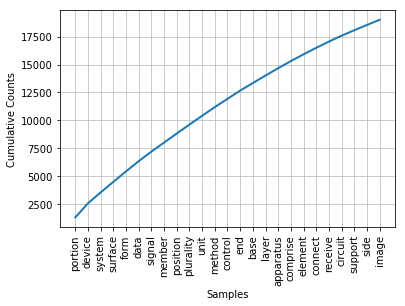

In [38]:
words_2 = list(chain.from_iterable(dic.values()))
#use freqdist to find the corresponding frequcy with each word
fd_1 = FreqDist(words_2)
#show the words
vocabulary1=fd_1.keys()
#show the top-20 frequency words
frequent_words=vocabulary1[:20]
#make a plot to visulazation
fd_1.plot(25, cumulative=True)

In [39]:
len(frequent_words)

20

In [40]:
#remove top-20 words for each value in dictionary
for k, v in dic.iteritems():
    dic[k] = [word for word in v if word not in frequent_words]
dic['07910771']

[u'invention_relate',
 u'method',
 u'produce',
 u'acrylic',
 u'acid',
 u'step',
 u'oxydehydration',
 u'reaction',
 u'glycerol',
 u'presence',
 u'molecular',
 u'oxygen',
 u'reaction',
 u'preferably',
 u'carry',
 u'gaseous',
 u'phase',
 u'presence',
 u'suitable',
 u'catalyst']

### STEP 7:  Removing words that only apperaring once in all abstracts

Firstly, I try to use hapaxes() function to count the words that only appear once in the whole text. But it seems that it does not work for some words that appear more than once under an Abstract of a Patent ID and also does not appear in the other abstracts.

In [482]:
#not recommeneded
#find the words which only appear once in all abstracts
lessFreqWords = set(fd_1.hapaxes())

In [483]:
len(lessFreqWords)

3277

So I try another way to find the words appearing only once and the words which appears more than once in a single abstracts but does not appear under the other abstrcts.

In [36]:
value_list=[]
for v in dic.values():
    value_list.append(v)

I write following code by myself to look for those satisified words and avoid removing bigrams simultaneously.

In [42]:
#Running this program may take a few munites, thanks for waiting
one_abstract_word=[]
temp_list_use=[]
#finding the words that does not appear in other abstracts
for i in range(len(value_list)):
    #if index=0, put abstract[1:] into a list, finding any words in first index doesn't appear in anther list
    if i==0:
        new_list=value_list[1:]
        for each in new_list:
            temp_list_use+=each
        for each in value_list[0]:
            if each not in temp_list_use:
                one_abstract_word.append(each)
        temp_list_use=[]
        i+=1
    #if i=last abstracts, put abstrcts[：-1] togther and make a list. Finding if any words in last abstract appears in former list.
    elif i==len(value_list)-1:
        new_list=value_list[:i]
        for each in new_list:
            temp_list_use+=each
        for each in value_list[i]:
            if each not in temp_list_use:
                one_abstract_word.append(each)
        temp_list_use=[]
        i+=1
    #make the bastract before and after index togther as a list. Finding if the words in index list appepars in another combined list.
    else:
        new_list=value_list[:i]+value_list[i+1:]
        for item in new_list:
            temp_list_use+=item
        for each in value_list[i]:
            if each not in temp_list_use:
                one_abstract_word.append(each)
        temp_list_use=[]
        i+=1

one_abstract_word_list=list(set(one_abstract_word))    

In [37]:
#print list from last step
#one_abstract_word_list

The following below shows the number of words I found from my code, which is more than about 1000 words need to be removed than using hapaxes() function.

In [44]:
len(one_abstract_word_list)

4783

Now removing the words

In [45]:
for k, v in dic.iteritems():
    dic[k] = [word for word in v if word not in one_abstract_word_list]
words_3=list(chain.from_iterable(dic.values()))

In [46]:
vocab_3 = set(words_3)
lexical_diversity3 = len(words_3)/len(vocab_3)
print "Vocabulary size: ",len(vocab_3),"\nTotal number of tokens: ", len(words_3), \
"\nLexical diversity: ", lexical_diversity3

Vocabulary size:  4486 
Total number of tokens:  132808 
Lexical diversity:  29.6049933125


Review the 'vocab' file, I found some numbers that does not help to search the relevant data. 
(This step should have done after building a vocab file. But in order to make the procedure clean and clear, I add this step before the final build)

In [66]:
#remove numbers
for k, v in dic.iteritems():
    dic[k] = [word for word in v if not word.isdigit()]

In [67]:
words_4=list(chain.from_iterable(dic.values()))
vocab_4 = set(words_4)
lexical_diversity4 = len(words_4)/len(vocab_4)
print "Vocabulary size: ",len(vocab_4),"\nTotal number of tokens: ", len(words_4), \
"\nLexical diversity: ", lexical_diversity4

Vocabulary size:  4453 
Total number of tokens:  132529 
Lexical diversity:  29.7617336627


Writing the PatentID and its abstract/abstracts to a text file. This step should be done twice. The first time is to use vocab_3 to build a file. After reviewing the file, I found some words look strange and can not help with further uses. Therefore, after removing those words, I build it at the second time.

In [68]:
words_5=list(set(chain.from_iterable(dic.values())))
output_handle=open('vocab.txt','w+')

for num in range(len(words_5)):
    line=str(num)+str(":")+str(words_5[num].encode('utf-8'))+"\n"
    output_handle.write(line)

output_handle.close()

### STEP 8: Build count vector

Next, I generate a count vector represented for each document. 

In [48]:
vectorizer = CountVectorizer(analyzer = "word")

Using "fit_transform" to fit the model and learn from the vocabulary. And then transform the text data into feature vectors. Since dictionary stored each tokenised article in a list, we concatenate all of the words in a list and separate them with the white spaces.

In [70]:
data_features = vectorizer.fit_transform([' '.join(value) for value in dic.values()])
print data_features.shape

(2500, 4335)


In order to save such a matrix in our computer memory but also speed up algebraic operations on a matrix, scikit-learn implements matrix/vector in a sparse representation.

In [71]:
vocab2 = vectorizer.get_feature_names()
for word, count in zip(words_5, data_features.toarray()[0]):
    if count > 0:
        print word, ":", count

ecg : 1
direct : 1
mating : 1
gauge : 1
stain : 1
doped : 1
operator : 1
select : 1
radiotherapy : 1
wager : 1
diametrically : 1
improved : 1
sink : 2
radiofrequency : 1
couple : 2
dielectric_layer : 1
1.5 : 1


Another way is to get the count list by using FreqDist.

In [64]:
FreqDist(dic['07910771'])

FreqDist({u'acid': 1,
          u'acrylic': 1,
          u'carry': 1,
          u'catalyst': 1,
          u'gaseous': 1,
          u'glycerol': 1,
          u'invention_relate': 1,
          u'method': 1,
          u'molecular': 1,
          u'oxygen': 1,
          u'phase': 1,
          u'preferably': 1,
          u'presence': 2,
          u'produce': 1,
          u'reaction': 2,
          u'step': 1,
          u'suitable': 1})

### STEP 9: Writing a csv file

In [72]:
out_file = open('count_vector.txt', 'w') #invention relate method
vocab = words_5
line=""
for g,d in dic.iteritems():
    out_file.write(g)
    #add comma before patentid
    out_file.write(",")
    d_idx = [vocab.index(w) for w in d]
    for k, v in FreqDist(d_idx).iteritems():
        #formate with words and index
        a="{}:{}".format(k,v)
        line+=str(a)+str(",")
    #remove comma at each end of the line
    new_line=line.rstrip(",")
    out_file.write(new_line)
    line=""
    out_file.write('\n')
out_file.close()

### Short Summay:
From this project, we pre-process several elements of the patents from the XML file. 
* 1.Extract and write a text file with the elements of: patent’s_ID:Section,Class,Subclass,Main_group,Subgroup.
* 2.Extract each patent's citation and write a file with the format of: citing_patent_id:cited_patent_id,cited_patent_id...
* 3.Count how many times that a particular patent has been cited and then save them in a file with format:cited_patent_id: times.
* 4.Extract all of the abstracts of all of the patents, and then process and store those abstracts as a sparse count vectors format. Then generate a vocabulary file which stores vocabularies and its indexes in a count_vectors file for the future use.